In [68]:
# Import Python driver
import neo4j
from neo4j import GraphDatabase
import pandas as pd
import networkx as nx

## Analyse eines Netzwerks von Terroristen

Als Datenbasis dient ein Netzwerk von Terroristen, das im Nachgang des Anschlags auf das World Trade Center am 11.09.2001 rekonstruiert wurde.

 **Node Labels des Netzwerks**
-  **Person**: Terroristen (Anzahl 60)
-  **Group**: Terroristengruppen (Anzahl 5)

 **Relationships des Netzwerks**
-  **Person [:KNOWS] Person**: Bekanntschaft zwischen Terroristen (Anzahl 302)
-  **Person [:PART_OF] Group**: Zuordnung zwischen Terrorist und dessen Gruppe (Anzahl 60)

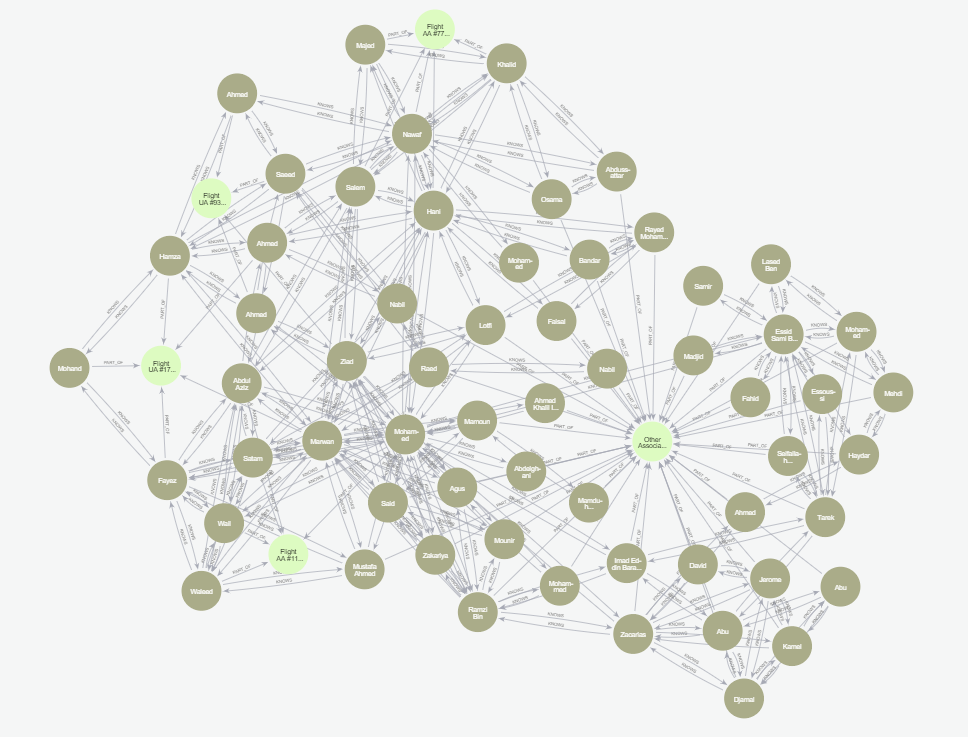

### Aufgabe 1
Verbinde dich mit dem Python Client auf die Neo4j AuraDB und ermittle mit einer Cypher-Query die Anzahl der Terroristen, die mit Flug AA #11 in das WTC North geflogen sind (Terroristengruppe mit groupid=1).

In [52]:
# Connection properties
URI = "neo4j+s://35049ef8.databases.neo4j.io"
AUTH = ("neo4j", "jTXJ9PTZv7QDy1Z6PIf3DzhlGzJeUyFZYqqoil5rhVw")

# Connect to DB and execute query
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    records, summary, keys = driver.execute_query("""
                                       MATCH (p:Person)-[:PART_OF]->(g:Group {groupid:'1'})
                                       RETURN count(p) as number
                                       """,
                                       database_="neo4j",)
    

# Loop through results and do something with them
print(records[0]['number'])

5


### Aufgabe 2
Lese alle Terroristen-Nodes inkl. aller Properties aus dem Neo4j-Graphen aus und überführe ihn in einen NetworkX Graphen.

In [86]:
# Connect to DB and execute query
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    n_records, n_keys, n_summary = driver.execute_query("""
                                                  MATCH(p:Person)
                                                  RETURN *
                                                  """,
                                                  database_="neo4j",
                                                  result_transformer_=neo4j.Result.to_eager_result)

# Create NetworkX Graph
G = nx.MultiDiGraph()


for node in n_records:
    print(node['n']['node_name'])
    G.add_node(node=node.personid, labels=node.labels, properties=node.properties)


KeyError: 'n'

In [ ]:
# Connect to DB and execute query
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    records, summary, keys = driver.execute_query("""
                                                  MATCH(n)-[r]->(m)
                                                  RETURN *
                                                  """,
                                                  database_="neo4j",)
    
# Keep in mind that MATCH (n)-[r]->(c) RETURN * query may not retrieve the entire neo4j graph
# since unconnected nodes will be omitted. If you need your entire graph with unconnected nodes,
# add nodes from the results of MATCH (n) RETURN n query and then add relations from MATCH (n)-[r]->(c) RETURN *


# Create NetworkX Graph
G = nx.MultiDiGraph()

nodes = records.graph()._nodes.values()
for node in nodes:
    G.add_node(node.id, labels=node._labels, properties=node._properties)

rels = list(records.graph()._relationships.values())
for rel in rels:
    G.add_edge(rel.start_node.id, rel.end_node.id, key=rel.id, type=rel.type, properties=rel._properties)


In [9]:
records, summary, keys = driver.execute_query("MATCH (p:Person) RETURN(p.personid, p.firstname, p.lastname", database_="neo4j")

# Loop through results and do something with them
for record in records:
    print(record.data())  # obtain record as dict

/tmp/ipykernel_26705/3191093376.py:1: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  records, summary, keys = driver.execute_query("MATCH (p:Person) RETURN(p.personid, p.firstname, p.lastname", database_="neo4j")


CypherSyntaxError: {code: Neo.ClientError.Statement.SyntaxError} {message: Invalid input ',': expected
  "!="
  "%"
  ")"
  "*"
  "+"
  "-"
  "/"
  "::"
  "<"
  "<="
  "<>"
  "="
  "=~"
  ">"
  ">="
  "AND"
  "CONTAINS"
  "ENDS"
  "IN"
  "IS"
  "OR"
  "STARTS"
  "XOR"
  "^" (line 1, column 35 (offset: 34))
"MATCH (p:Person) RETURN(p.personid, p.firstname, p.lastname"
                                   ^}